# Análise de Pacientes com Doença de Graves

## Introdução
Este projeto é parte de um Trabalho de Conclusão de Curso (TCC) do curso de Medicina da Universidade Federal do Piauí, sob autoria de Claudia Roque e orientação do Dr. Rogério Santiago. O objetivo é analisar dados de pacientes com Doença de Graves, com foco em dados demográficos, laboratoriais, clínicos e tratamentos, em dois momentos de avaliação (primeira e segunda medições). Esta documentação detalha os passos iniciais da análise exploratória e tratamento de dados.

## Análise Exploratória dos Dados do Paciente (Concluída)
Iniciamos a consultoria com a análise exploratória dos dados demográficos e temporais dos pacientes, que serviram como base para entender o perfil da amostra:
- **Colunas Iniciais**:
  - `Paciente`, `Sexo`, `Data de Nascimento`, `Altura (cm)`, `Data1`.
- **Colunas Calculadas**:
  - `Idade_dias`, `Idade_meses`, `Idade_anos`: Idade do paciente em dias, meses e anos, calculada com base na data atual (10/04/2025) e `Data de Nascimento`.
  - `medicao1_dias`, `medicao1_meses`, `medicao1_anos`: Tempo decorrido desde a primeira medição (`Data1`) até a data atual (10/04/2025).

### Resultados Obtidos
- Analisamos a distribuição de `Sexo` (84.4% mulheres, 15.6% homens), `Altura (cm)` (média geral de 159.39 cm, com imputação de valores ausentes por sexo), `Idade_anos` (média de 49.20 anos, mediana de 53.5 anos) e `medicao1_anos` (média de 10.33 anos, mediana de 11 anos).
- Tratamos valores ausentes e outliers, garantindo que os dados demográficos estejam prontos para análises futuras.
- Identificamos que o desequilíbrio de gênero e o tempo desde a primeira medição podem influenciar variáveis clínicas e laboratoriais, o que será explorado nas próximas etapas.

## Próximo Passo: Análise dos Dados de Exames
Com os dados demográficos e temporais bem caracterizados, avançamos para a análise dos dados de exames, que incluem:
- **Dados Laboratoriais**: Resultados de exames como `TSH1`, `T4L1`, `TSH2`, `T4L2`, entre outros, que medem os níveis hormonais dos pacientes em dois momentos (primeira e segunda medições).
- **Dados Clínicos**: Variáveis como `Exoftalmia1` e `Exoftalmia2`, que indicam a presença e gravidade de sintomas relacionados à Doença de Graves.

### Objetivos
- Realizar uma análise exploratória inicial para identificar padrões, outliers e possíveis valores ausentes nos dados laboratoriais e clínicos.
- Avaliar a distribuição dessas variáveis e sua relação com os dados demográficos (ex.: diferenças por sexo, correlação com idade ou tempo desde a primeira medição).
- Preparar os dados para análises comparativas entre a primeira e a segunda medição, investigando a evolução da Doença de Graves e a resposta aos tratamentos.

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
from scipy.stats import ttest_rel, pearsonr
from statsmodels.stats.contingency_tables import mcnemar
warnings.filterwarnings('ignore')

In [195]:
document = r"C:\Users\Markos Alves\Downloads\Coleta De Dados (Trat usuarios).xlsx".replace("\\","/")

In [196]:
arq = pd.read_excel(document)

In [197]:
arq.columns

Index(['Paciente', 'Sexo', 'Data de nascimento', 'Altura (cm)', 'Data1',
       'Idade Referente1', 'Peso (kg)1', 'imc1', 'USG1', 'Nódulo1', 'PT (g)1',
       'lab1', 'TSH1', 'T4L1', 'alvo rerapeutico 0,9 a 2 ng', 'lim inf T4L1',
       'lim sup T4L1', '(V/R) T4L1', 'Ac TPO 1', ' lim sup Ac TPO1',
       '(V/R)  Ac TPO1', 'Ac TG 1', ' lim inf  Ac TG1', ' lim sup Ac TG1',
       ' (V/R) Ac TG1', 'TRAb 1', 'lim sup TRAb1', '(V/R) TRAb1',
       'Exoftalmia1', 'palpitação1', 'Diplopia1', 'Mixedema 1', 'Gc oral 1',
       'Pulsoterapia1', 'Tionamidas1', 'Beta-bloqueador1', 'RIT1',
       ' levotiroxina1', 'Tireoidectomia1', 'deltaT', 'Data2',
       'Idade Referente2', 'Peso (kg)2', 'imc2', 'USG2', 'Nódulo2', 'PT (g) 2',
       'lab2', 'TSH2', 'T4L2', 'lim inf T4L2', 'lim sup T4L2', '(V/R) T4L2',
       'Ac TPO2', 'lim sup Ac TPO2', '(V/R) Ac TPO2', 'Ac TG2',
       'lim inf Ac TG2', 'lim sup Ac TG2', '(V/R) Ac TG2', 'TRAb2',
       'lim sup TRAb2', '(V/R) TRAb2', 'Exoftalmia2', 'palpitaçã

In [198]:
hoje = pd.to_datetime(datetime.today().date())
arq['medicao2_dias'] = (hoje - arq['Data2']).dt.days
arq['medicao2_anos'] = arq['medicao2_dias'] // 365
arq['medicao2_meses'] = arq['medicao2_dias'] // 30

In [199]:
dados_paciente = arq[['Data1', 'Sexo',
       'Idade Referente1', 'Peso (kg)1', 'imc1', 'USG1', 'Nódulo1', 'PT (g)1',
       'lim inf T4L1', 'TSH1', 'T4L1',
       'lim sup T4L1', '(V/R) T4L1', 'Ac TPO 1', ' lim sup Ac TPO1',
       '(V/R)  Ac TPO1', 'Ac TG 1', ' lim inf  Ac TG1', ' lim sup Ac TG1', 'TRAb 1',
       ' (V/R) Ac TG1', 'lim sup TRAb1', '(V/R) TRAb1',
       'Data2',
       'Idade Referente2', 'Peso (kg)2', 'imc2', 'USG2', 'Nódulo2', 'PT (g) 2',
       'lim inf T4L2', 'TSH2', 'T4L2',
       'lim sup T4L2', '(V/R) T4L2', 'Ac TPO2', 'lim sup Ac TPO2', 
        '(V/R) Ac TPO2', 'Ac TG2', 'lim inf Ac TG2', 'lim sup Ac TG2', 'TRAb2',
       '(V/R) Ac TG2', 'lim sup TRAb2', '(V/R) TRAb2', 'Idade_dias', 'Idade_anos',
       'Idade_meses', 'medicao1_dias', 'medicao1_anos', 'medicao1_meses', 'medicao2_dias', 'medicao2_anos', 'medicao2_meses',]]

In [200]:
print(dados_paciente.columns)

Index(['Data1', 'Sexo', 'Idade Referente1', 'Peso (kg)1', 'imc1', 'USG1',
       'Nódulo1', 'PT (g)1', 'lim inf T4L1', 'TSH1', 'T4L1', 'lim sup T4L1',
       '(V/R) T4L1', 'Ac TPO 1', ' lim sup Ac TPO1', '(V/R)  Ac TPO1',
       'Ac TG 1', ' lim inf  Ac TG1', ' lim sup Ac TG1', 'TRAb 1',
       ' (V/R) Ac TG1', 'lim sup TRAb1', '(V/R) TRAb1', 'Data2',
       'Idade Referente2', 'Peso (kg)2', 'imc2', 'USG2', 'Nódulo2', 'PT (g) 2',
       'lim inf T4L2', 'TSH2', 'T4L2', 'lim sup T4L2', '(V/R) T4L2', 'Ac TPO2',
       'lim sup Ac TPO2', '(V/R) Ac TPO2', 'Ac TG2', 'lim inf Ac TG2',
       'lim sup Ac TG2', 'TRAb2', '(V/R) Ac TG2', 'lim sup TRAb2',
       '(V/R) TRAb2', 'Idade_dias', 'Idade_anos', 'Idade_meses',
       'medicao1_dias', 'medicao1_anos', 'medicao1_meses', 'medicao2_dias',
       'medicao2_anos', 'medicao2_meses'],
      dtype='object')


In [201]:
dados_paciente.dtypes

Data1               datetime64[ns]
Sexo                        object
Idade Referente1             int64
Peso (kg)1                  object
imc1                        object
USG1                        object
Nódulo1                     object
PT (g)1                     object
lim inf T4L1               float64
TSH1                       float64
T4L1                       float64
lim sup T4L1               float64
(V/R) T4L1                 float64
Ac TPO 1                    object
 lim sup Ac TPO1            object
(V/R)  Ac TPO1              object
Ac TG 1                     object
 lim inf  Ac TG1            object
 lim sup Ac TG1             object
TRAb 1                      object
 (V/R) Ac TG1               object
lim sup TRAb1              float64
(V/R) TRAb1                 object
Data2               datetime64[ns]
Idade Referente2             int64
Peso (kg)2                  object
imc2                        object
USG2                        object
Nódulo2             

In [202]:
# Tratamento para TRAb 1
dados_paciente['TRAb 1'] = dados_paciente['TRAb 1'].astype(str).replace('>40', '40', regex=False)
dados_paciente['TRAb 1'] = pd.to_numeric(dados_paciente['TRAb 1'], errors='coerce')
dados_paciente['(V/R) TRAb1'] = pd.to_numeric(dados_paciente['(V/R) TRAb1'], errors='coerce')

# Tratamento para TRAb2
dados_paciente['TRAb2'] = dados_paciente['TRAb2'].astype(str).replace('>40', '40', regex=False)
dados_paciente['TRAb2'] = pd.to_numeric(dados_paciente['TRAb2'], errors='coerce')
dados_paciente['(V/R) TRAb2'] = pd.to_numeric(dados_paciente['(V/R) TRAb2'], errors='coerce')

# Funções

In [203]:
# Função para análise de variáveis numéricas
def analyze_numeric_variable(series, var_name):
    print(f"\nAnálise de {var_name}:")
    
    # Verificar valores ausentes
    n_missing = series.isna().sum()
    print(f"Valores ausentes: {n_missing} ({n_missing/len(series)*100:.1f}%)")
    
    # Estatísticas descritivas
    desc = series.describe()
    print(f"Média: {desc['mean']:.2f}")
    print(f"Mediana: {desc['50%']:.2f}")
    print(f"Desvio Padrão: {desc['std']:.2f}")
    print(f"Mínimo: {desc['min']:.2f}")
    print(f"Máximo: {desc['max']:.2f}")
    
    # Identificar outliers (critério IQR)
    Q1 = desc['25%']
    Q3 = desc['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    print(f"Outliers (IQR): {outliers.tolist()}")
    
    # Visualização: Histograma com curva de densidade
    plt.figure(figsize=(8, 6))
    sns.histplot(series, kde=True, stat="density")
    plt.title(f"Distribuição de {var_name}")
    plt.xlabel(var_name)
    plt.ylabel("Densidade")
    plt.show()

# Função para análise de variáveis categóricas
def analyze_categorical_variable(series, var_name):
    print(f"\nAnálise de {var_name}:")
    
    # Verificar valores ausentes
    n_missing = series.isna().sum()
    print(f"Valores ausentes: {n_missing} ({n_missing/len(series)*100:.1f}%)")
    
    # Frequências absolutas e relativas
    freq_abs = series.value_counts()
    freq_rel = series.value_counts(normalize=True) * 100
    print("Frequências Absolutas:")
    print(freq_abs)
    print("\nFrequências Relativas (%):")
    print(freq_rel)
    
    # Visualização: Gráfico de barras
    plt.figure(figsize=(8, 6))
    sns.countplot(x=series)
    plt.title(f"Distribuição de {var_name}")
    plt.xlabel(var_name)
    plt.ylabel("Contagem")
    plt.show()

In [204]:
# Calcular o intervalo entre as medições
dados_paciente['intervalo_anos'] = dados_paciente['medicao1_anos'] - dados_paciente['medicao2_anos']

# Função para análise comparativa de variáveis numéricas
def compare_numeric_variables(var1, var2, var_name):
    print(f"\nComparação entre {var_name}1 e {var_name}2:")
    
    # Calcular diferenças
    diff = var2 - var1
    dados_paciente[f'diff_{var_name}'] = diff
    
    # Estatísticas das diferenças
    print("Estatísticas das Diferenças:")
    print(f"Média da diferença: {diff.mean():.2f}")
    print(f"Mediana da diferença: {diff.median():.2f}")
    print(f"Desvio Padrão da diferença: {diff.std():.2f}")
    
    # Teste t pareado
    t_stat, p_value = ttest_rel(var1, var2)
    print(f"Teste t pareado: t = {t_stat:.2f}, p-valor = {p_value:.4f}")
    if p_value < 0.05:
        print("Diferença estatisticamente significativa (p < 0.05).")
    else:
        print("Diferença não estatisticamente significativa (p >= 0.05).")
    
    # Visualização: Boxplot comparativo
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=pd.DataFrame({f'{var_name}1': var1, f'{var_name}2': var2}))
    plt.title(f'Comparação de {var_name} entre as Duas Medições')
    plt.ylabel(var_name)
    plt.show()
    
    # Correlação com intervalo entre medições
    corr, p_corr = pearsonr(diff, dados_paciente['intervalo_anos'])
    print(f"Correlação entre a diferença de {var_name} e o intervalo entre medições: {corr:.2f} (p-valor = {p_corr:.4f})")
    if p_corr < 0.05:
        print("Correlação estatisticamente significativa (p < 0.05).")
    else:
        print("Correlação não estatisticamente significativa (p >= 0.05).")
    
    # Visualização: Scatter plot da diferença vs. intervalo
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='intervalo_anos', y=f'diff_{var_name}', data=dados_paciente)
    plt.title(f'Diferença de {var_name} vs. Intervalo entre Medições')
    plt.xlabel('Intervalo entre Medições (anos)')
    plt.ylabel(f'Diferença ({var_name}2 - {var_name}1)')
    plt.show()

# Função para análise comparativa de variáveis categóricas
def compare_categorical_variables(var1, var2, var_name):
    print(f"\nComparação entre {var_name}1 e {var_name}2:")
    
    # Tabela de contingência
    contingency_table = pd.crosstab(var1, var2, rownames=[f'{var_name}1'], colnames=[f'{var_name}2'])
    print("Tabela de Contingência:")
    print(contingency_table)
    
    # Teste de McNemar
    # Para o teste de McNemar, precisamos de uma tabela 2x2 (sim/não)
    table = contingency_table.values
    result = mcnemar(table, exact=True)
    print(f"Teste de McNemar: estatística = {result.statistic:.2f}, p-valor = {result.pvalue:.4f}")
    if result.pvalue < 0.05:
        print("Mudança estatisticamente significativa (p < 0.05).")
    else:
        print("Mudança não estatisticamente significativa (p >= 0.05).")
    
    # Visualização: Gráfico de barras empilhadas
    contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f'Comparação de {var_name} entre as Duas Medições')
    plt.xlabel(f'{var_name}1')
    plt.ylabel('Contagem')
    plt.legend(title=f'{var_name}2')
    plt.show()

## Preparação para Análise dos Dados de Exames

### Estrutura do DataFrame
O DataFrame `dados_paciente` foi atualizado para incluir os dados demográficos, temporais, laboratoriais e clínicos, organizados em dois momentos de avaliação (primeira e segunda medições):
- **Dados Temporais**:
  - `Data1`, `Data2`: Datas das medições.
  - `medicao1_dias`, `medicao1_meses`, `medicao1_anos`: Tempo desde a primeira medição até 10/04/2025.
  - `medicao2_dias`, `medicao2_meses`, `medicao2_anos`: Tempo desde a segunda medição até 10/04/2025.
- **Dados Demográficos** (já analisados):
  - `Idade Referente1`, `Idade Referente2`, `Idade_dias`, `Idade_meses`, `Idade_anos`.
- **Dados Antropométricos**:
  - `Peso (kg)1`, `Peso (kg)2`, `imc1`, `imc2`.
- **Dados Laboratoriais**:
  - `(V/R) T4L1`, `(V/R) T4L2`: Níveis de T4 livre.
  - `(V/R) Ac TPO1`, `(V/R) Ac TPO2`: Anticorpos anti-TPO.
  - `(V/R) Ac TG1`, `(V/R) Ac TG2`: Anticorpos anti-tireoglobulina.
  - `(V/R) TRAb1`, `(V/R) TRAb2`: Anticorpos anti-receptor de TSH (TRAb).
- **Dados Clínicos e de Imagem**:
  - `USG1`, `USG2`: Resultados de ultrassonografia da tireoide.
  - `Nódulo1`, `Nódulo2`: Presença de nódulos tireoidianos.
  - `PT (g)1`, `PT (g) 2`: Peso da tireoide em gramas.

### Plano de Análise
Os dados laboratoriais e clínicos estão organizados em dois tempos (primeira e segunda medições). Seguiremos o seguinte plano:

#### 1. Análise Individual
- Analisar cada variável separadamente em cada momento:
  - **Primeira Medição**: `T4L1`, `TRAb1`, `Nódulo1`, etc.
  - **Segunda Medição**: `T4L2`, `TRAb2`, `Nódulo2`, etc.
- Calcular estatísticas descritivas (média, mediana, desvio padrão).
- Identificar outliers e valores ausentes.
- Visualizar distribuições (histogramas para variáveis contínuas, gráficos de barras para categóricas).

#### 2. Análise Comparativa
- Comparar as variáveis entre os dois momentos (ex.: `T4L1` vs. `T4L2`) para avaliar a evolução da Doença de Graves.
- Calcular diferenças (ex.: `T4L2 - T4L1`) e testar significância estatística (ex.: teste t pareado).
- Correlacionar as mudanças com o intervalo entre as medições (`medicao1_anos - medicao2_anos`).

#### 3. Análise por Sexo
- Estratificar as análises individuais e comparativas por sexo (38 mulheres, 7 homens) para identificar diferenças de gênero na evolução da doença.
- Exemplo: Comparar `T4L1` entre homens e mulheres, e avaliar se a mudança `T4L2 - T4L1` difere entre os sexos.

#### 4. Correlações
- Investigar correlações entre os dados de exames e variáveis demográficas (ex.: `Idade_anos`, `medicao1_anos`, `imc1`).

### Preparação do DataFrame
Antes de iniciar a análise, realizaremos os seguintes passos:
1. **Verificar Valores Ausentes**:
   - Checar `nan` ou valores inadequados (ex.: `'?'`) nas colunas laboratoriais e clínicas.
2. **Tratar Tipos de Dados**:
   - Garantir que variáveis contínuas (ex.: `T4L1`, `PT (g)1`) sejam numéricas.
   - Garantir que variáveis categóricas (ex.: `Nódulo1`, `USG1`) estejam no formato correto.
3. **Padronizar Variáveis Laboratoriais**:
   - As colunas `(V/R) T4L1`, `(V/R) TRAb1`, etc., podem estar no formato "valor/referência". Inicialmente, extrairemos apenas o valor numérico para análise quantitativa (ex.: `T4L1` = 1.2), mantendo o intervalo de referência para interpretação clínica.
4. **Calcular Intervalo entre Medições**:
   - Criar a coluna `intervalo_anos` = `medicao1_anos - medicao2_anos` para usar na análise comparativa.

### Próximos Passos
1. Fornecer os dados das variáveis laboratoriais (ex.: `T4L1`, `TRAb1`) e clínicas (ex.: `Nódulo1`) para iniciar a análise exploratória.
2. Decidir o foco inicial: começar com uma variável laboratorial (ex.: `T4L1

# 1. Análise Individual

## 1.2 Análise Exploratória Inicial - Coluna `Nódulo1, Nódulo2`

In [205]:
dados_paciente['Nódulo1'] = dados_paciente['Nódulo1'].str.upper()
dados_paciente['Nódulo1'] = dados_paciente['Nódulo1'].str.strip()
dados_paciente['Nódulo2'] = dados_paciente['Nódulo2'].str.upper()
dados_paciente['Nódulo2'] = dados_paciente['Nódulo2'].str.strip()

In [206]:
# Agrupa pelos valores únicos de Nódulo1 e Nódulo2 e conta quantas vezes cada combinação aparece
agrupado = dados_paciente[['Nódulo1', 'Sexo']].groupby(['Nódulo1', 'Sexo']).size().reset_index(name='Contagem')

# Calcula a porcentagem
total = agrupado['Contagem'].sum()
agrupado['Porcentagem'] = (agrupado['Contagem'] / total) * 100
display(agrupado)

,Nódulo1,Sexo,Contagem,Porcentagem
0,-,F,7,15.555556
1,-,M,2,4.444444
2,NÃO,F,25,55.555556
3,NÃO,M,5,11.111111
4,SIM,F,6,13.333333


In [207]:
# Agrupa pelos valores únicos de Nódulo1 e Nódulo2 e conta quantas vezes cada combinação aparece
agrupado = dados_paciente[['Nódulo1', 'Sexo']].groupby(['Nódulo1', 'Sexo']).size().reset_index(name='Contagem')

# Calcula a porcentagem
total = agrupado['Contagem'].sum()
agrupado['Porcentagem'] = (agrupado['Contagem'] / total) * 100
display(agrupado)

,Nódulo1,Sexo,Contagem,Porcentagem
0,-,F,7,15.555556
1,-,M,2,4.444444
2,NÃO,F,25,55.555556
3,NÃO,M,5,11.111111
4,SIM,F,6,13.333333


In [208]:
# Agrupa pelos valores únicos de Nódulo1 e Nódulo2 e conta quantas vezes cada combinação aparece
agrupado = dados_paciente[['Nódulo1', 'Nódulo2', 'Sexo']].groupby(['Nódulo1', 'Nódulo2', 'Sexo']).size().reset_index(name='Contagem')

# Calcula a porcentagem
total = agrupado['Contagem'].sum()
agrupado['Porcentagem'] = (agrupado['Contagem'] / total) * 100
display(agrupado)

,Nódulo1,Nódulo2,Sexo,Contagem,Porcentagem
0,-,-,F,3,6.818182
1,-,-,M,2,4.545455
2,-,NÃO,F,3,6.818182
3,-,SIM,F,1,2.272727
4,NÃO,-,F,12,27.272727
5,NÃO,-,M,4,9.090909
6,NÃO,NÃO,F,10,22.727273
7,NÃO,NÃO,M,1,2.272727
8,NÃO,SIM,F,2,4.545455
9,SIM,-,F,2,4.545455


## 1.2 Análise Exploratória Inicial - Colunas `T4L1, (V/R) T4L1, T4L2, (V/R) T4L2, TRAb 1, (V/R) TRAb1, TRAb2, (V/R) TRAb2`


Análise de T4L1:
Valores ausentes: 0 (0.0%)
Média: 2.12
Mediana: 1.47
Desvio Padrão: 1.48
Mínimo: 0.17
Máximo: 6.22
Outliers (IQR): [6.0, 6.22]


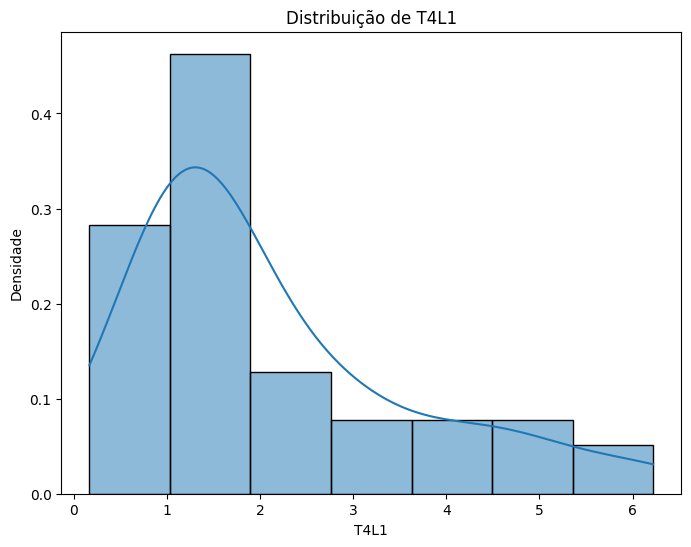


Análise de (V/R) T4L1:
Valores ausentes: 0 (0.0%)
Média: 1.19
Mediana: 0.86
Desvio Padrão: 0.81
Mínimo: 0.08
Máximo: 3.16
Outliers (IQR): [3.157894737, 2.941176471, 2.961904762]


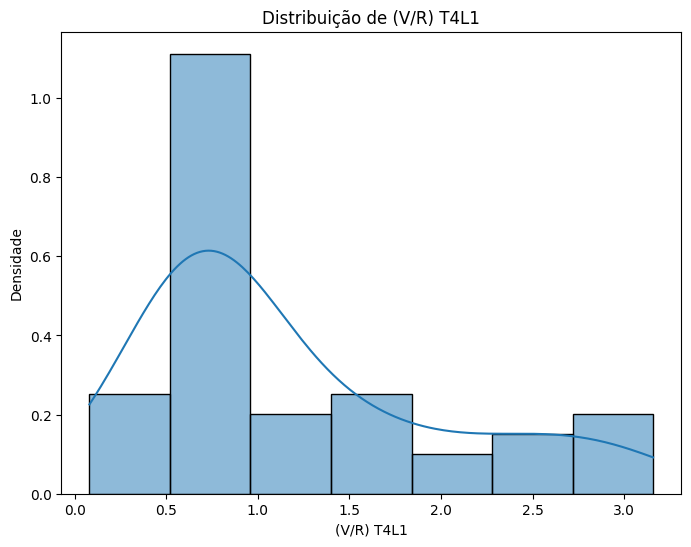


Análise de T4L2:
Valores ausentes: 0 (0.0%)
Média: 1.38
Mediana: 1.10
Desvio Padrão: 0.96
Mínimo: 0.29
Máximo: 5.00
Outliers (IQR): [2.1, 3.69, 4.3, 5.0, 3.0, 2.56]


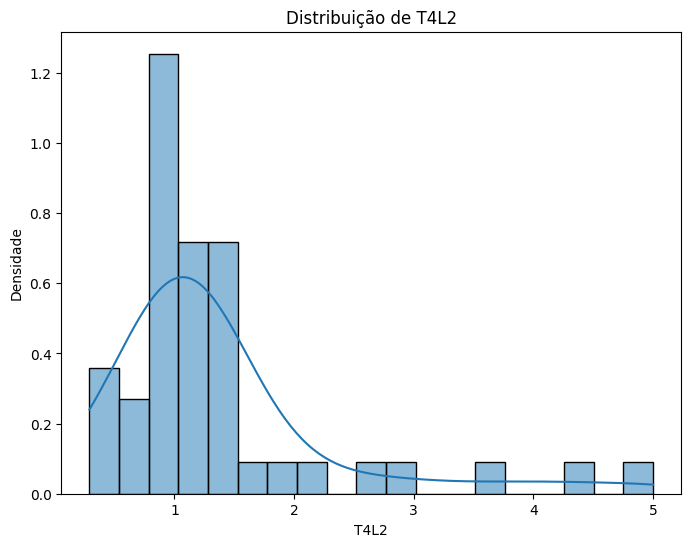


Análise de (V/R) T4L2:
Valores ausentes: 0 (0.0%)
Média: 0.76
Mediana: 0.67
Desvio Padrão: 0.48
Mínimo: 0.14
Máximo: 2.39
Outliers (IQR): [1.5, 1.757142857, 0.1380952381, 2.388888889, 2.283105023, 0.2947368421, 1.764705882, 1.347368421, 1.077777778, 0.2764705882, 0.2777777778]


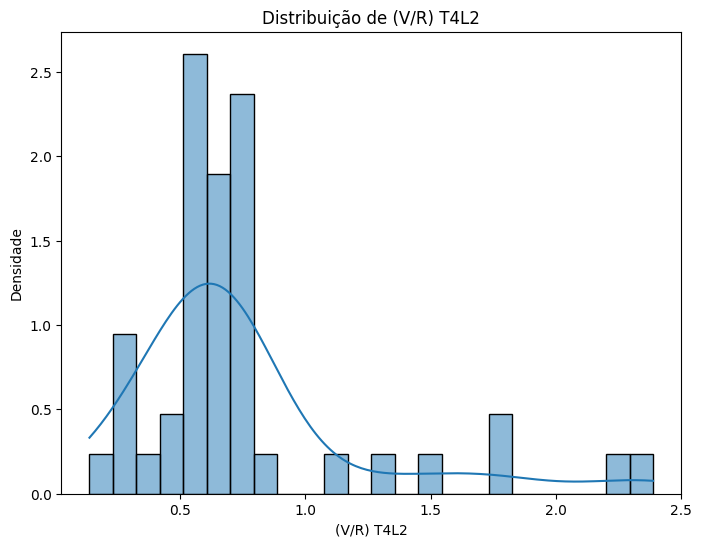


Análise de TRAb 1:
Valores ausentes: 0 (0.0%)
Média: 10.70
Mediana: 5.50
Desvio Padrão: 12.90
Mínimo: 0.01
Máximo: 40.00
Outliers (IQR): [40.0, 40.0, 40.0, 40.0, 40.0]


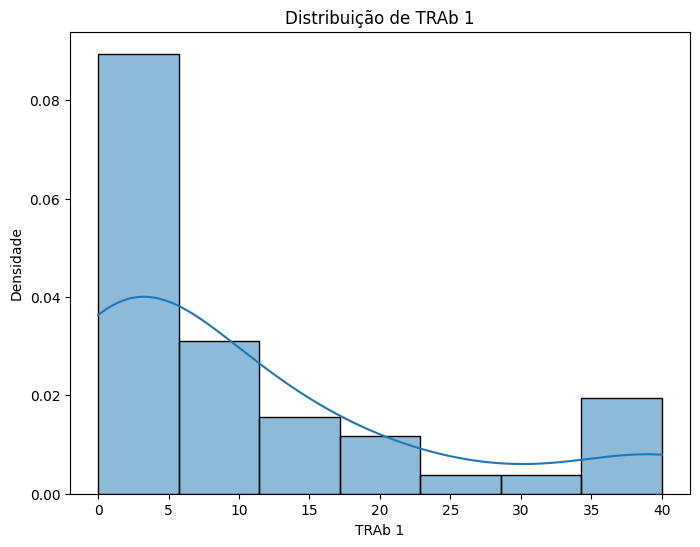


Análise de (V/R) TRAb1:
Valores ausentes: 1 (2.2%)
Média: 7.83
Mediana: 4.91
Desvio Padrão: 7.73
Mínimo: 0.10
Máximo: 24.55
Outliers (IQR): []


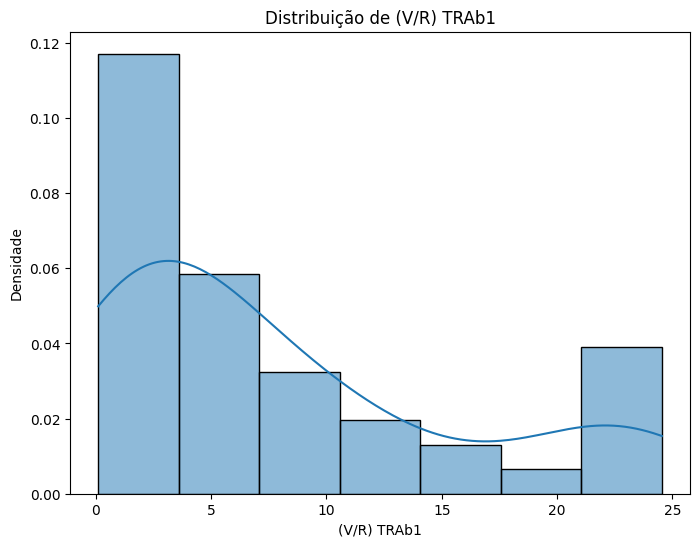


Análise de TRAb2:
Valores ausentes: 0 (0.0%)
Média: 6.53
Mediana: 1.62
Desvio Padrão: 9.61
Mínimo: 0.04
Máximo: 40.00
Outliers (IQR): [29.0, 40.0]


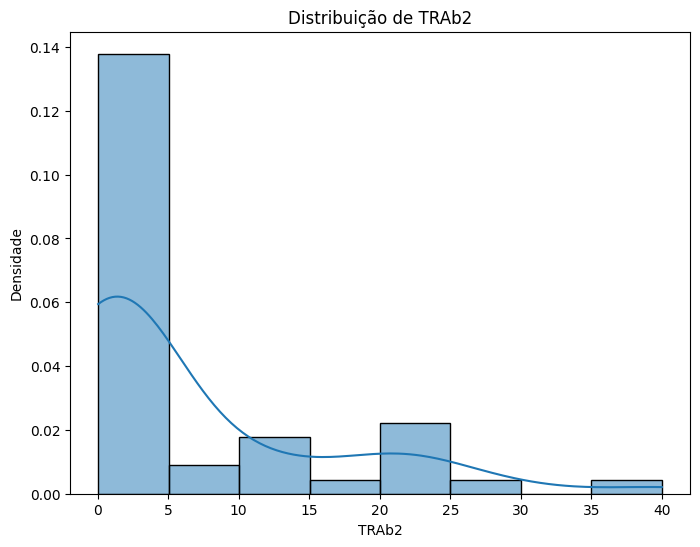


Análise de (V/R) TRAb2:
Valores ausentes: 3 (6.7%)
Média: 8.21
Mediana: 1.53
Desvio Padrão: 16.36
Mínimo: 0.06
Máximo: 80.00
Outliers (IQR): [20.54545455, 49.0, 41.34, 80.0, 43.4]


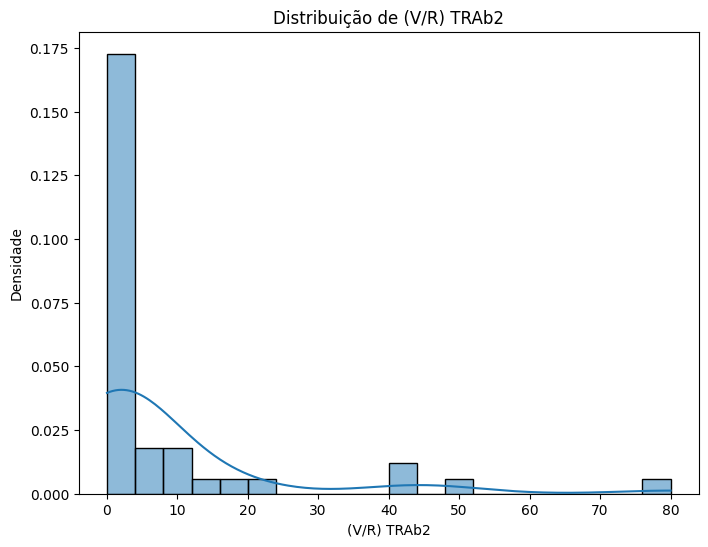


Análise de Nódulo1:
Valores ausentes: 0 (0.0%)
Frequências Absolutas:
Nódulo1
NÃO    30
-       9
SIM     6
Name: count, dtype: int64

Frequências Relativas (%):
Nódulo1
NÃO    66.666667
-      20.000000
SIM    13.333333
Name: proportion, dtype: float64


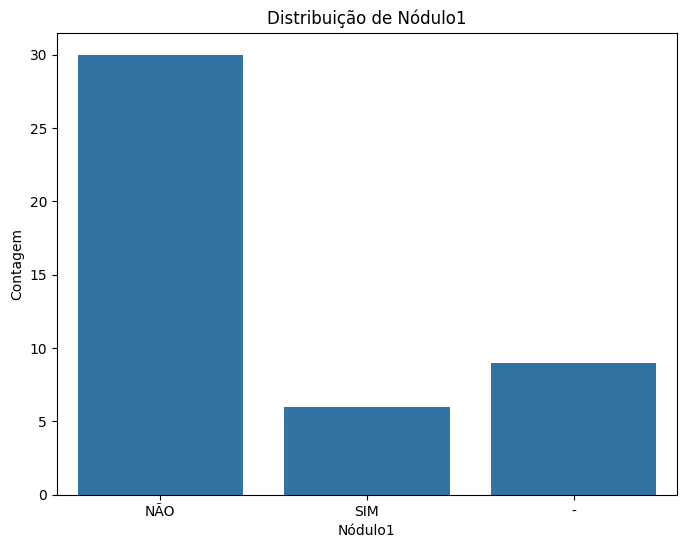


Análise de Nódulo2:
Valores ausentes: 1 (2.2%)
Frequências Absolutas:
Nódulo2
-      23
NÃO    15
SIM     6
Name: count, dtype: int64

Frequências Relativas (%):
Nódulo2
-      52.272727
NÃO    34.090909
SIM    13.636364
Name: proportion, dtype: float64


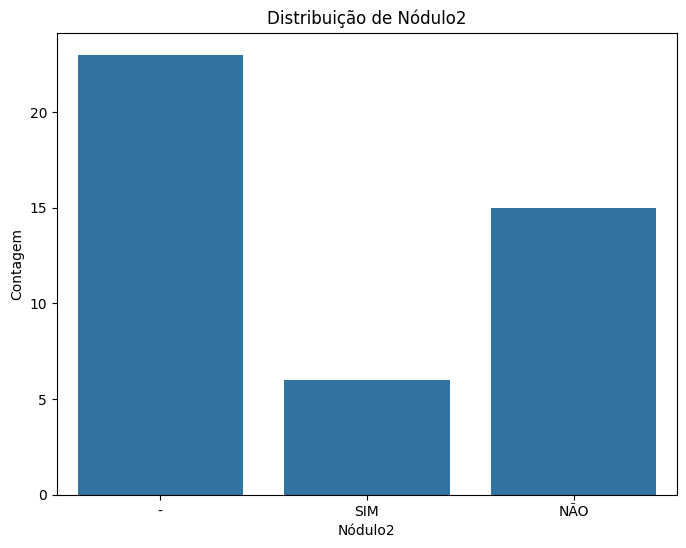

In [209]:
# Analisar cada variável
# Variáveis numéricas
numeric_vars = ['T4L1', '(V/R) T4L1', 'T4L2', '(V/R) T4L2', 'TRAb 1', '(V/R) TRAb1', 'TRAb2', '(V/R) TRAb2']
for var in numeric_vars:
    analyze_numeric_variable(dados_paciente[var], var)

# Variáveis categóricas
categorical_vars = ['Nódulo1', 'Nódulo2']
for var in categorical_vars:
    analyze_categorical_variable(dados_paciente[var], var)

# 2. Análise Comparativa
- Comparar as variáveis entre os dois momentos (ex.: `T4L1` vs. `T4L2`) para avaliar a evolução da Doença de Graves.
- Calcular diferenças (ex.: `T4L2 - T4L1`) e testar significância estatística (ex.: teste t pareado).
- Correlacionar as mudanças com o intervalo entre as medições (`medicao1_anos - medicao2_anos`).

## 2.1 Análise Exploratória Inicial - Colunas `T4L1, (V/R) T4L1, T4L2, (V/R) T4L2, TRAb 1, (V/R) TRAb1, TRAb2, (V/R) TRAb2`

In [210]:
dados_paciente['intervalo_anos'] = dados_paciente['medicao1_anos'] - dados_paciente['medicao2_anos']


Comparação entre T4L1 e T4L2:
Estatísticas das Diferenças:
Média da diferença: -0.74
Mediana da diferença: -0.30
Desvio Padrão da diferença: 1.71
Teste t pareado: t = 2.90, p-valor = 0.0057
Diferença estatisticamente significativa (p < 0.05).


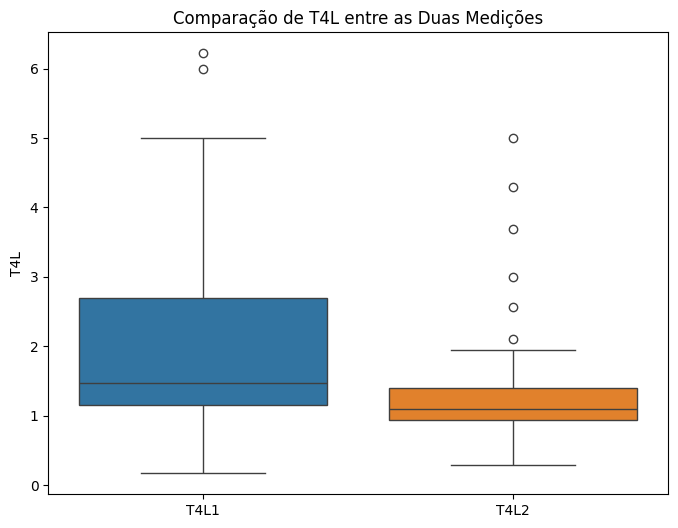

Correlação entre a diferença de T4L e o intervalo entre medições: -0.00 (p-valor = 0.9877)
Correlação não estatisticamente significativa (p >= 0.05).


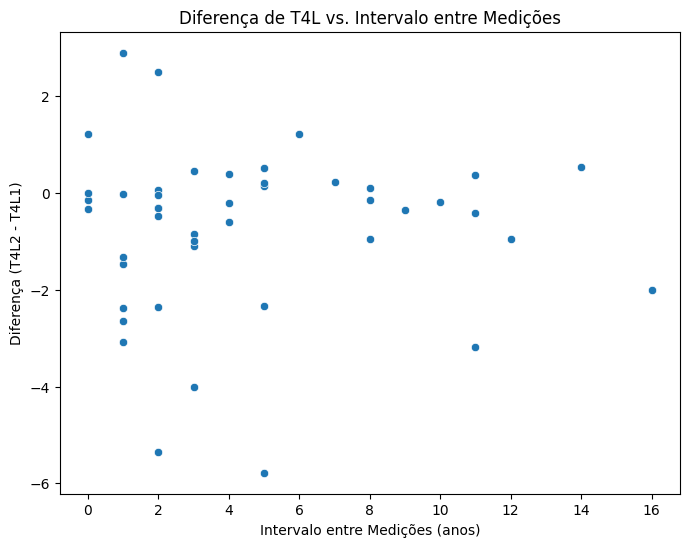


Comparação entre TRAb1 e TRAb2:
Estatísticas das Diferenças:
Média da diferença: -4.17
Mediana da diferença: -1.77
Desvio Padrão da diferença: 14.75
Teste t pareado: t = 1.89, p-valor = 0.0647
Diferença não estatisticamente significativa (p >= 0.05).


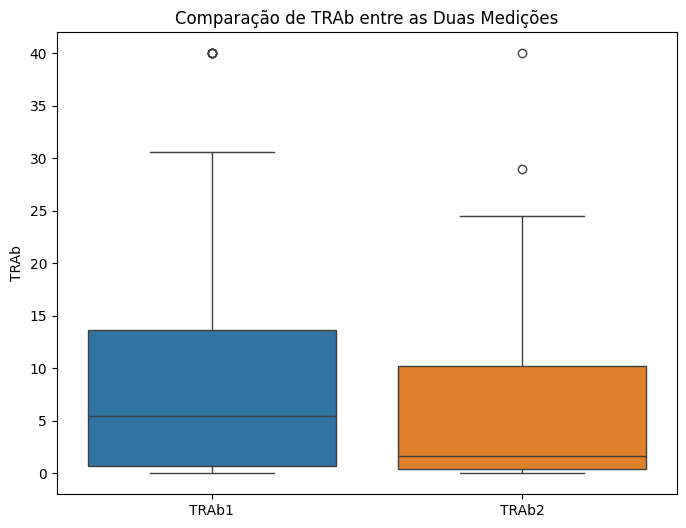

Correlação entre a diferença de TRAb e o intervalo entre medições: 0.07 (p-valor = 0.6596)
Correlação não estatisticamente significativa (p >= 0.05).


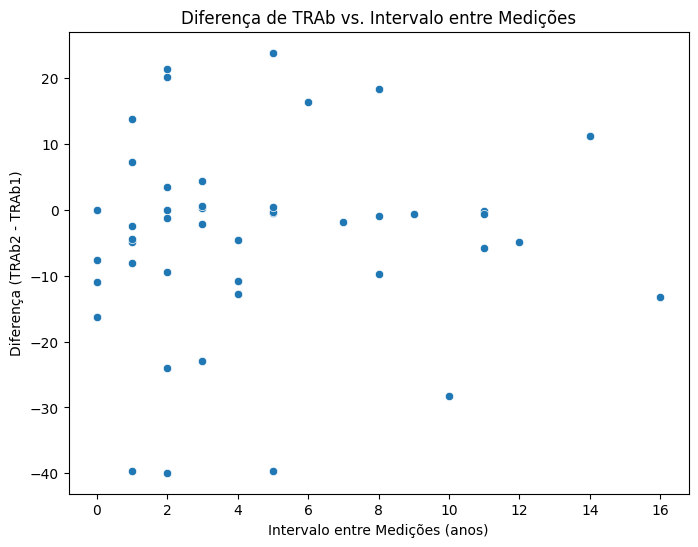


Comparação entre Nódulo1 e Nódulo2:
Tabela de Contingência:
Nódulo2   -  NÃO  SIM
Nódulo1              
-         5    3    1
NÃO      16   11    2
SIM       2    1    3
Teste de McNemar: estatística = 3.00, p-valor = 0.0044
Mudança estatisticamente significativa (p < 0.05).


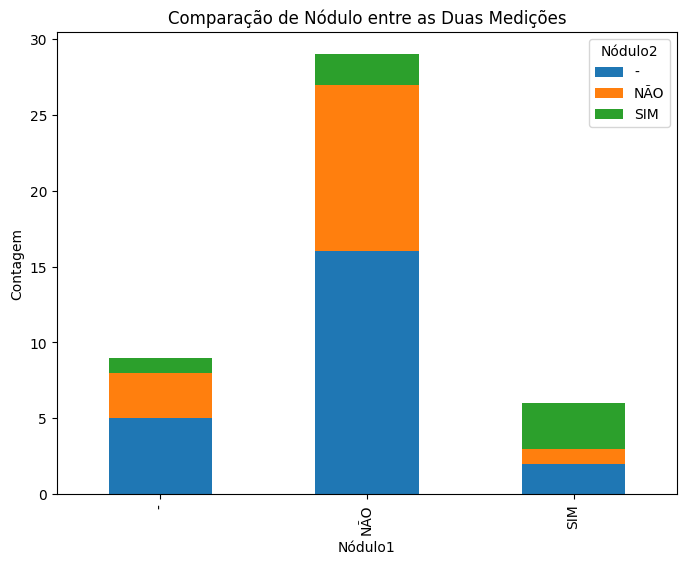

In [214]:
# Realizar a análise comparativa
# Variáveis numéricas
compare_numeric_variables(dados_paciente['T4L1'], dados_paciente['T4L2'], 'T4L')
compare_numeric_variables(dados_paciente['TRAb 1'], dados_paciente['TRAb2'], 'TRAb')

# Variáveis categóricas
compare_categorical_variables(dados_paciente['Nódulo1'], dados_paciente['Nódulo2'], 'Nódulo')